# Feature Engineering 

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('./merged_file.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711341 entries, 0 to 711340
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DDate         711341 non-null  object 
 1   AmcCode       711341 non-null  int64  
 2   AmcName       711341 non-null  object 
 3   YardCode      711341 non-null  int64  
 4   YardName      711341 non-null  object 
 5   CommCode      711341 non-null  int64  
 6   CommName      711341 non-null  object 
 7   VarityCode    711341 non-null  int64  
 8   VarityName    711341 non-null  object 
 9   Arrivals      711341 non-null  float64
 10  Minimum       711341 non-null  float64
 11  Maximum       711341 non-null  float64
 12  Model         711341 non-null  float64
 13  ProgArrivals  392920 non-null  float64
 14  Valuation     392920 non-null  float64
 15  MarketFee     392920 non-null  float64
dtypes: float64(7), int64(4), object(5)
memory usage: 86.8+ MB


In [18]:
df.describe()

,AmcCode,YardCode,CommCode,VarityCode,Arrivals,Minimum,Maximum,Model,ProgArrivals,Valuation,MarketFee
count,711341.000000,711341.000000,711341.000000,711341.000000,7.113410e+05,7.113410e+05,7.113410e+05,7.113410e+05,392920.0,392920.0,392920.0
mean,299.751195,777.740684,82.636138,125.788684,4.139143e+02,3.514749e+07,3.450563e+03,2.150867e+52,0.0,0.0,0.0
std,46.452447,651.595940,55.703066,77.769759,4.092253e+03,2.964156e+10,4.049753e+04,1.814064e+55,0.0,0.0,0.0
min,186.000000,1.000000,1.000000,1.000000,1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
25%,278.000000,6.000000,25.000000,87.000000,9.730000e+00,1.000000e+03,1.500000e+03,1.250000e+03,0.0,0.0,0.0
50%,322.000000,1080.000000,101.000000,114.000000,4.300000e+01,1.600000e+03,2.300000e+03,2.000000e+03,0.0,0.0,0.0
75%,325.000000,1330.000000,117.000000,197.000000,2.340000e+02,3.050000e+03,4.500000e+03,3.939000e+03,0.0,0.0,0.0
max,379.000000,1728.000000,271.000000,330.000000,1.743030e+06,2.500000e+13,3.346335e+07,1.530000e+58,0.0,0.0,0.0


## Temporal Features

In [19]:

# Convert DDate to datetime (handling the timezone offset if present)
df['DDate'] = pd.to_datetime(df['DDate'], utc=True).dt.tz_convert(None)

# Verify conversion
print(df['DDate'].dtype)  # Should show 'datetime64[ns]'

datetime64[ns]


In [20]:
# Extract datetime components
df['Year'] = df['DDate'].dt.year
df['Month'] = df['DDate'].dt.month
df['DayOfWeek'] = df['DDate'].dt.dayofweek  # Monday=0
df['WeekOfYear'] = df['DDate'].dt.isocalendar().week

# Agricultural season flags (India-specific)
df['IsRabiSeason'] = df['Month'].isin([11, 12, 1, 2, 3]).astype(int)  # Nov-Mar
df['IsKharifSeason'] = df['Month'].isin([6, 7, 8, 9, 10]).astype(int)   # Jun-Oct

## Fix Data Quality Issues 

In [21]:
df['Model'] = np.where(df['Model'] > 1e10, np.nan, df['Model'])

# Fix Minimum > Maximum cases
df.loc[df['Minimum'] > df['Maximum'], ['Minimum', 'Maximum']] = np.nan

# Impute missing ProgArrivals (44.8% missing)
df['ProgArrivals_Missing'] = df['ProgArrivals'].isnull().astype(int)
df['ProgArrivals'] = df.groupby(['CommCode', 'Month'])['ProgArrivals'].transform(lambda x: x.fillna(x.median()))

C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711341 entries, 0 to 711340
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DDate                 711341 non-null  datetime64[ns]
 1   AmcCode               711341 non-null  int64         
 2   AmcName               711341 non-null  object        
 3   YardCode              711341 non-null  int64         
 4   YardName              711341 non-null  object        
 5   CommCode              711341 non-null  int64         
 6   CommName              711341 non-null  object        
 7   VarityCode            711341 non-null  int64         
 8   VarityName            711341 non-null  object        
 9   Arrivals              711341 non-null  float64       
 10  Minimum               706390 non-null  float64       
 11  Maximum               706390 non-null  float64       
 12  Model                 711340 non-null  float64       
 13 

In [23]:
# Drop specified columns
df = df.drop(columns=[
    'AmcCode',
    'YardCode',
    'CommCode',
    'VarityCode',
    'ProgArrivals',
    'MarketFee',
    'ProgArrivals_Missing'
])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711341 entries, 0 to 711340
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DDate           711341 non-null  datetime64[ns]
 1   AmcName         711341 non-null  object        
 2   YardName        711341 non-null  object        
 3   CommName        711341 non-null  object        
 4   VarityName      711341 non-null  object        
 5   Arrivals        711341 non-null  float64       
 6   Minimum         706390 non-null  float64       
 7   Maximum         706390 non-null  float64       
 8   Model           711340 non-null  float64       
 9   Valuation       392920 non-null  float64       
 10  Year            711341 non-null  int32         
 11  Month           711341 non-null  int32         
 12  DayOfWeek       711341 non-null  int32         
 13  WeekOfYear      711341 non-null  UInt32        
 14  IsRabiSeason    711341 non-null  int

## Handling Missing Values

In [25]:
# Fill small missing values with median
df['Minimum'].fillna(df['Minimum'].median(), inplace=True)
df['Maximum'].fillna(df['Maximum'].median(), inplace=True)
df['Model'].fillna(df['Model'].median(), inplace=True)

# Drop or impute 'Valuation' depending on its importance
if df['Valuation'].isnull().mean() > 0.4:
    df.drop(columns='Valuation', inplace=True)  # Too sparse to keep
else:
    df['Valuation'].fillna(df['Valuation'].median(), inplace=True)


C:\Users\abdul\AppData\Local\Temp\ipykernel_5556\3336845480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Minimum'].fillna(df['Minimum'].median(), inplace=True)
C:\Users\abdul\AppData\Local\Temp\ipykernel_5556\3336845480.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


 ## Feature Transformation & Creation

In [26]:
df['PriceSpread'] = df['Maximum'] - df['Minimum']

In [27]:
df['Volatility'] = df['PriceSpread'] / (df['Model'] + 1e-6)


In [28]:
df['LogArrivals'] = np.log1p(df['Arrivals'])


## Date-Based Features

In [29]:
df['Quarter'] = df['DDate'].dt.quarter

## Seasonal Tags

In [30]:

df['IsSummer'] = df['Month'].isin([4, 5, 6]).astype(int)
df['IsWinter'] = df['Month'].isin([12, 1, 2]).astype(int)


# Data Frame with DDate

In [31]:
df.to_csv('final_dataset_DDate.csv', index=False)

## DDate Removing

In [32]:
df.drop(columns='DDate', inplace=True)

### Finalized Data Frame


### ['AmcName', 'YardName', 'CommName', 'VarityName','Arrivals', 'Minimum', 'Maximum', 'Model','Year', 'Month', 'DayOfWeek', 'WeekOfYear', 'IsRabiSeason', 'IsKharifSeason', 'PriceSpread','Volatility', 'LogArrivals', 'Quarter', 'IsWeekend']

# Visulazing  Data Frame

In [33]:
print(df.head())          # First 5 rows
print(df.info())          # Data types, missing values
print(df.describe())      # Summary statistics for numerical columns


      AmcName    YardName CommName     VarityName  Arrivals  Minimum  Maximum  \
0    Warangal    Warangal    Paddy         Common     637.0   1310.0   1330.0   
1  Jammikunta  Jammikunta    Paddy  Common (1001)     161.0   1300.0   1310.0   
2    Warangal    Warangal    Paddy         Common     287.0   1310.0   1330.0   
3    Warangal    Warangal    Paddy         Common     329.0   1310.0   1330.0   
4    Warangal    Warangal    Paddy         Common     149.0   1500.0   1675.0   

    Model  Year  Month  DayOfWeek  WeekOfYear  IsRabiSeason  IsKharifSeason  \
0  1320.0  2014      1          2           1             1               0   
1  1310.0  2014      1          2           1             1               0   
2  1320.0  2014      1          3           1             1               0   
3  1320.0  2014      1          4           1             1               0   
4  1600.0  2014      1          6           1             1               0   

   PriceSpread  Volatility  LogArrival

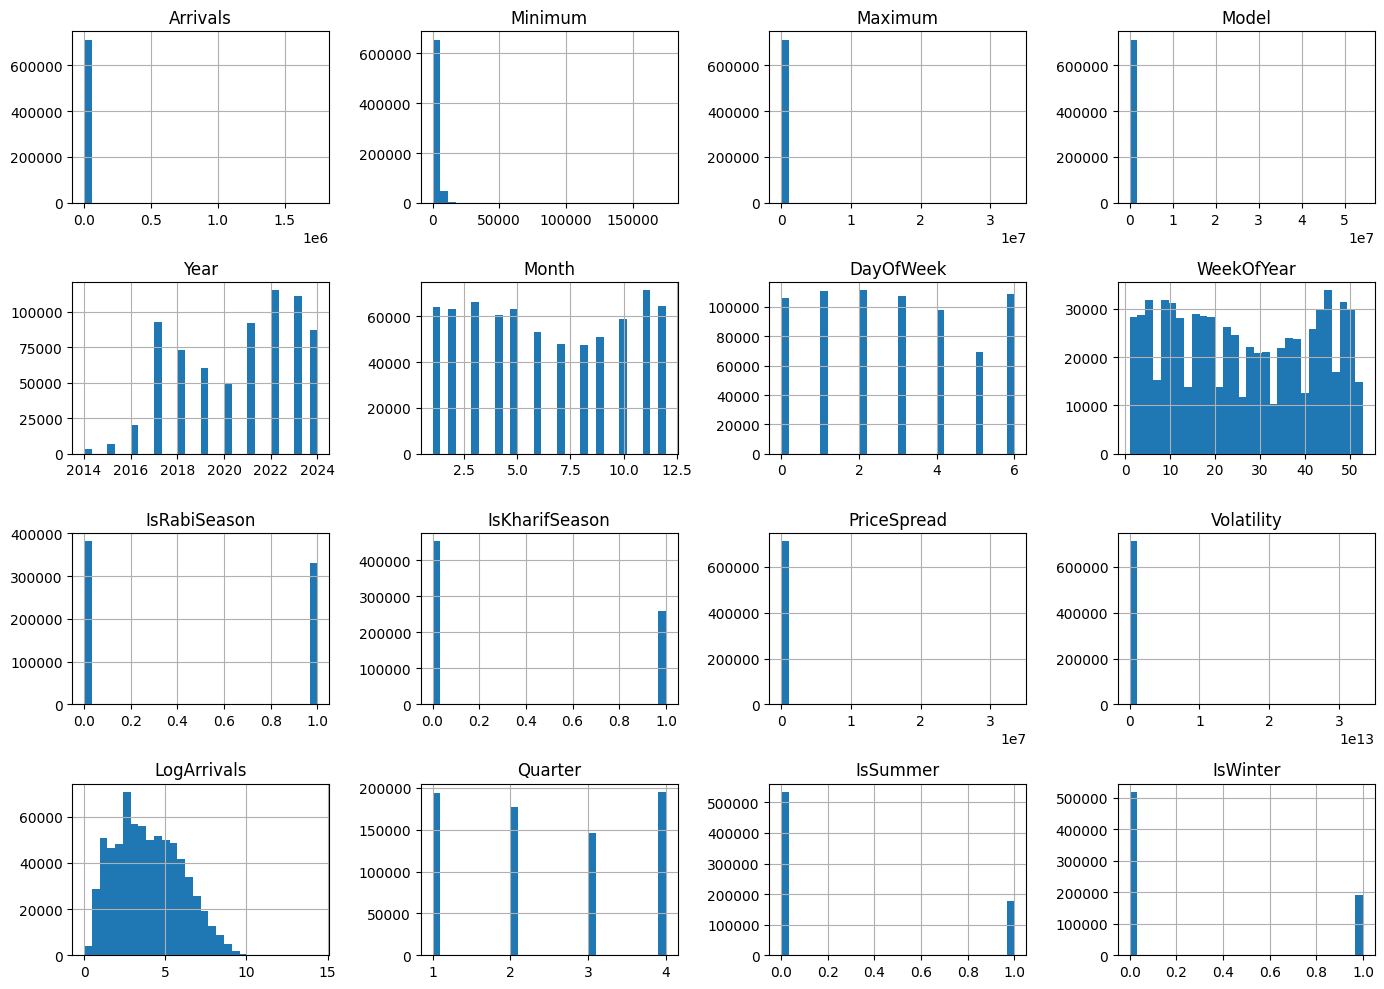

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()


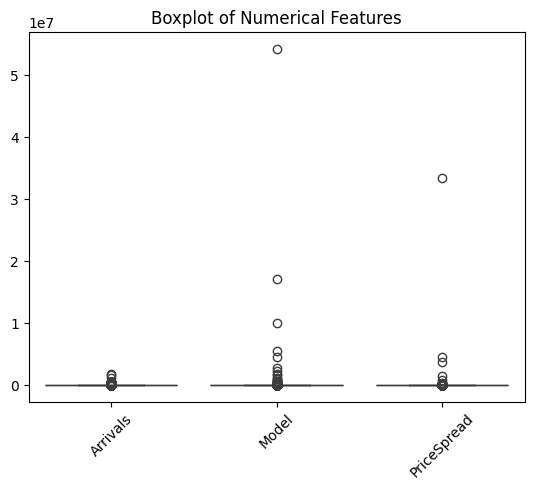

In [35]:
sns.boxplot(data=df[['Arrivals', 'Model', 'PriceSpread']])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()


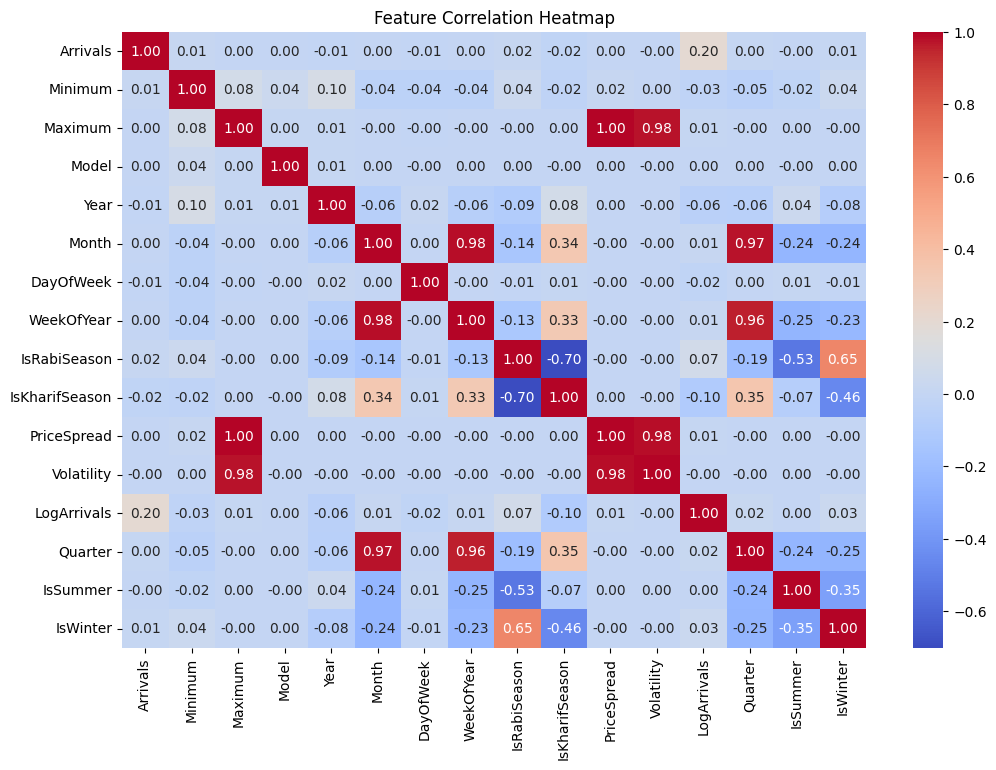

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()


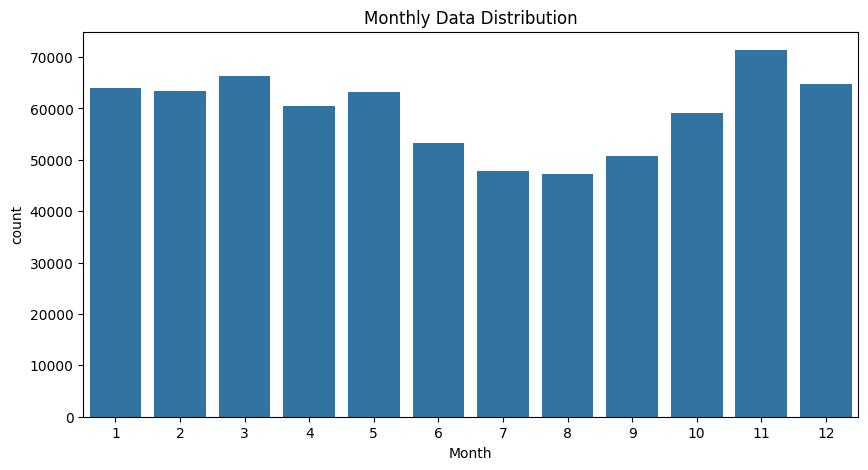

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df)
plt.title('Monthly Data Distribution')
plt.show()


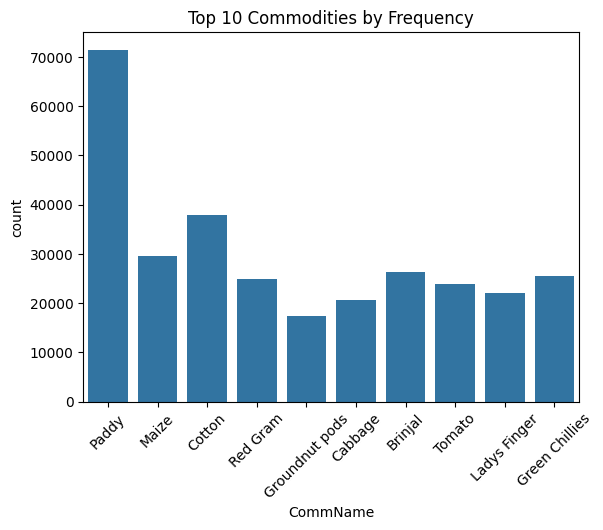

In [38]:
top_commodities = df['CommName'].value_counts().head(10).index
sns.countplot(data=df[df['CommName'].isin(top_commodities)], x='CommName')
plt.xticks(rotation=45)
plt.title('Top 10 Commodities by Frequency')
plt.show()


In [ ]:
sns.pairplot(df[['Arrivals', 'Minimum', 'Maximum', 'Model', 'PriceSpread']])
plt.show()


## Save the Finalized DataFrame

In [ ]:
df.to_csv('final_dataset.csv', index=False)